# Анализ убытков приложения ProcrastinatePRO+

В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.



## Подготовка данных к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
Изучим данные и выполним предобработку.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [2]:
sessions = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

Теперь посмотрим на данные в трех датасетах.

In [3]:
display(sessions.head())
print(sessions.info())
print(sessions.isna().sum())

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


В датасете 'sessions':
- отсутсвуют пропуски 
- типы в столбцах Session Start и Session End неверные, их надо привести к типу datetime
- название столбцов необходимо привести к нижнему регистру, и заполнить пробелы нижним подчеркиванием

In [4]:
display(orders.head())
print(orders.info())
print(orders.isna().sum())

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
User Id     0
Event Dt    0
Revenue     0
dtype: int64


В датасете 'orders':
- отсутсвуют пропуски
- тип в столбце Event Dt надо привести к типу datetime
- название столбцов также необходимо привести к нижнему регистру, и заполнить пробелы нижним подчеркиванием

In [5]:
display(costs.head())
print(costs.info())
print(costs.isna().sum())

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
dt         0
Channel    0
costs      0
dtype: int64


В датасете 'costs':
- отсутсвуют пропуски
- тип в столбце dt надо привести к типу datetime
- столбец Channel необходимо привести к нижнему регистру

In [6]:
sessions.columns = sessions.columns.str.lower().str.replace(' ', '_')

orders.columns = orders.columns.str.lower().str.replace(' ', '_')

costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [7]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Проверим правильность исправлений.

In [8]:
display(sessions.head())
display(orders.head())
display(costs.head())

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Проверим датасеты на дубликаты.

In [9]:
print(sessions.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Дубликаты отсутсвуют.

**ВЫВОД:** в данном блоке мы привели данные к рабочему виду для дальнейшей работы, а именно:
 - привели все столбцы к нижнему регистру с заполнением пробелов на нижнее подчеркивание
 - изменили тип в столбцах с датами на datetime
 - провели поиск дубликатов и пропусков

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для создания профилей пользователей

In [10]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    first_time = profiles['dt'].min()
    last_time = profiles['dt'].max()
    return profiles, first_time, last_time

### Функция для подсчёта Retention Rate

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для подсчёта конверсии

In [12]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для подсчёта LTV

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для сглаживания данных

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для построения графика Retention Rate

In [15]:
def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    ).fillna(0)
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция для построения графика конверсии

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для визуализации LTV и ROI

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Профили пользователей, минимальная и максимальная даты привлечения пользователей

Составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей используя функцию "get_profiles".

In [18]:
profiles, first_time, last_time = get_profiles(sessions, orders, costs)
display(profiles.head())
print(first_time)
print(last_time)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

2019-05-01
2019-10-27


 - минимальная дата привлечения пользователей 2019-05-01
 - максимальная дата привлечения пользователей: 2019-10-27

### Количество пользователей и доля платящих пользователей по странам

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Также построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [19]:
users_by_country = (profiles.groupby('region')
    .agg({'user_id':'nunique', 'payer':'sum'})
    .assign(percent = lambda x: x['payer'] / x['user_id'] * 100)
    .sort_values(by='payer', ascending = False)
    .rename(columns = {'user_id':'visits'}))
display(users_by_country)

visits  payer   percent
region                                
United States  100002   6902  6.901862
UK              17575    700  3.982930
France          17450    663  3.799427
Germany         14981    616  4.111875

США лидирует по всем позициям:
 - самое большое количество клиентов
 - самое большое количество платящих клиентов
 - самый высокий процент платящих клиентов

### ТОП устройств пользователей

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [20]:
users_by_device = (profiles.groupby('device')
    .agg({'user_id':'nunique', 'payer':'sum'})
    .assign(percent = lambda x: x['payer'] / x['user_id'] * 100)
    .rename(columns = {'user_id' : 'visits'})
    .sort_values(by='payer', ascending = False))
users_by_device['percent'] = round(users_by_device['percent'], 2)
display(users_by_device)

visits  payer  percent
device                         
iPhone    54479   3382     6.21
Android   35032   2050     5.85
Mac       30042   1912     6.36
PC        30455   1537     5.05

С Айфоном история похожа на США из предыдущего блока, с одной лишь поправкой на процент платящих клиентов, в этой категории самый лучший показатель у Макбука.

### Рекламные источники и  каналы привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [21]:
users_by_channel = (profiles.groupby('channel')
    .agg({'user_id':'nunique', 'payer':'sum'})
    .assign(percent = lambda x: x['payer'] / x['user_id'] * 100)
    .rename(columns = {'user_id' : 'visits'})
    .sort_values(by='payer', ascending = False))
users_by_channel['percent'] = round(users_by_channel['percent'], 2)
display(users_by_channel)

visits  payer  percent
channel                                   
FaceBoom             29144   3557    12.20
TipTop               19561   1878     9.60
organic              56439   1160     2.06
WahooNetBanner        8553    453     5.30
AdNonSense            3880    440    11.34
RocketSuperAds        4448    352     7.91
LeapBob               8553    262     3.06
OppleCreativeMedia    8605    233     2.71
lambdaMediaAds        2149    225    10.47
YRabbit               4312    165     3.83
MediaTornado          4364    156     3.57

- лучший процент платящих клиентов с рекламы FaceBoom
- самое большое количество клиентов - "органические", но в то же время, в данной категории, малый процент оплат

**ВЫВОД:** В данном блоке мы провели исследовательский анализ данных:
 - выявили лучшие и худшие каналы привлечения клиентов
 - составили ТОП устройств, с которых пользователи пользуются приложением
 - выявили самые платежеспособные страны
 - выделили минимальную и максиммальную даты привлечения клиентов
 
Даты привлечения:
 - минимальная дата привлечения пользователей 2019-05-01
 - максимальная дата привлечения пользователей: 2019-10-27
 
Количество пользователей и доля платящих пользователей по странам:
 - в США всего 100002 посетителей, из которых 6902 сделали покупку (6,9%)
 - в Англии всего 17575 посетителей, из которых 700 сделали покупку (3,98%)
 - во Франции всего 17450 посетителей, из которых 663 сделали покупку (3,8%)
 - в Германии всего 14981 посетителей, из которых 616 сделали покупку (4,11%)
 
ТОП устройств пользователей:
 - iPhone используют 54479, из них 3382 совершили оплату (6.21%)
 - Android используют 35032, из них 2050 совершили оплату (5.85%)
 - PC используют 30455, из них 1537 совершили оплату (5.05%)
 - Mac используют 30042, из них 1912 совершили оплату (6.3%)
 
Рекламные источники и каналы привлечения:
 - лучший процент платящих клиентов с рекламы FaceBoom, всего 29144 пользователей, 3557 оплат (12.20%)
 - органических пользователей 56439, из них 1160 оплат (2.06%)

## Маркетинг

### Общая сумма расходов на маркетинг

Для начала посмотрим общую сумму затрат на маркетинг.

In [22]:
costs_all = costs['costs'].sum().astype('int64')
print(f'Общая сумма затрат на маркетинг:', costs_all, 'у.е.')

Общая сумма затрат на маркетинг: 105497 у.е.


### Распределение трат по рекламным источникам

In [23]:
channel_costs = (
    costs.groupby('channel').agg({'costs':'sum'})
    .assign(percent = lambda x: x['costs'] / costs_all * 100)
    .sort_values('costs', ascending = False))
channel_costs['percent'] = round(channel_costs['percent'], 2)
display(channel_costs)    


costs  percent
channel                              
TipTop              54751.30    51.90
FaceBoom            32445.60    30.75
WahooNetBanner       5151.00     4.88
AdNonSense           3911.25     3.71
OppleCreativeMedia   2151.25     2.04
RocketSuperAds       1833.00     1.74
LeapBob              1797.60     1.70
lambdaMediaAds       1557.60     1.48
MediaTornado          954.48     0.90
YRabbit               944.22     0.90

Основные затраты легли на TipTop и FaceBoom. Пока FaceBoom оправдывает вложения в рекламу, а TipTop с большими вложениями имеет низкий ROI.

### Динамика изменения расходов во времени

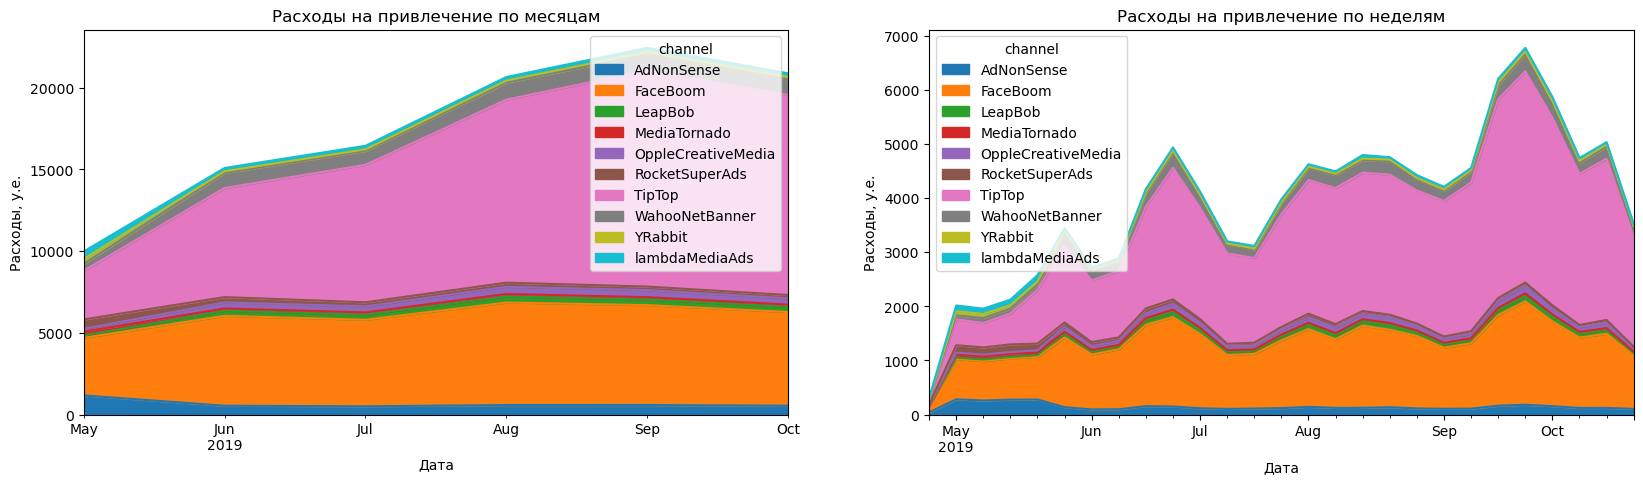

In [24]:
costs['Расходы на привлечение по месяцам'] = costs['dt'].astype('datetime64[M]')
costs['Расходы на привлечение по неделям'] = costs['dt'].astype('datetime64[W]')
columns = ['Расходы на привлечение по месяцам', 'Расходы на привлечение по неделям']
plt.subplots(figsize = (20, 5))
for i, col in enumerate(columns):
    costs.pivot_table(index = col, columns = 'channel', values = 'costs', aggfunc = 'sum').plot.area(ax = plt.subplot(1, 2, i + 1))
    plt.title(col)
    plt.xlabel('Дата')
    plt.ylabel('Расходы, у.е.')
plt.show()

На данных графиках мы видим рост инвестиций в каналы TipTop и FaceBoom по месяцам, остальные каналы имеют ровное распределение.

### Расчет средней стоимости привлечения одного пользователя (CAC) из каждого источника

In [25]:
mean_cac = costs_all / len(sessions['user_id'].unique())

display(profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values('acquisition_cost', ascending = False))

print(f'Средняя стоимость привлечения одного клиента за весь период: ', round(mean_cac, 3))

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Средняя стоимость привлечения одного клиента за весь период:  0.703


В данной таблице мы видим большую разницу между TipTop и FaceBoom. Привлечение посетителей через TipTop стоит более чем в два раза дороже, чем с FaceBoom.

**ВЫВОД:** проведя маркетинговое исследование, выяснили:
 - общая сумма затрат на маркетинг за период 2019.05.01 - 2019.10.27 составила 105497 у.е.
 - основные затраты на маркетинг были в каналы TipTop и FaceBoom
 - виден рост инвестиций в каналы TipTop и FaceBoom по месяцам
 - самый высокий САС у канала TipTop

## Окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

Первым делом, нам надо задать момент анализа и горизонт анализа. Так же, считаю необходимым отсечь органических пользователей для корректности результатов по рекламе.

In [26]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

profiles = profiles.query('channel != "organic"')

### Окупаемость рекламы 

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

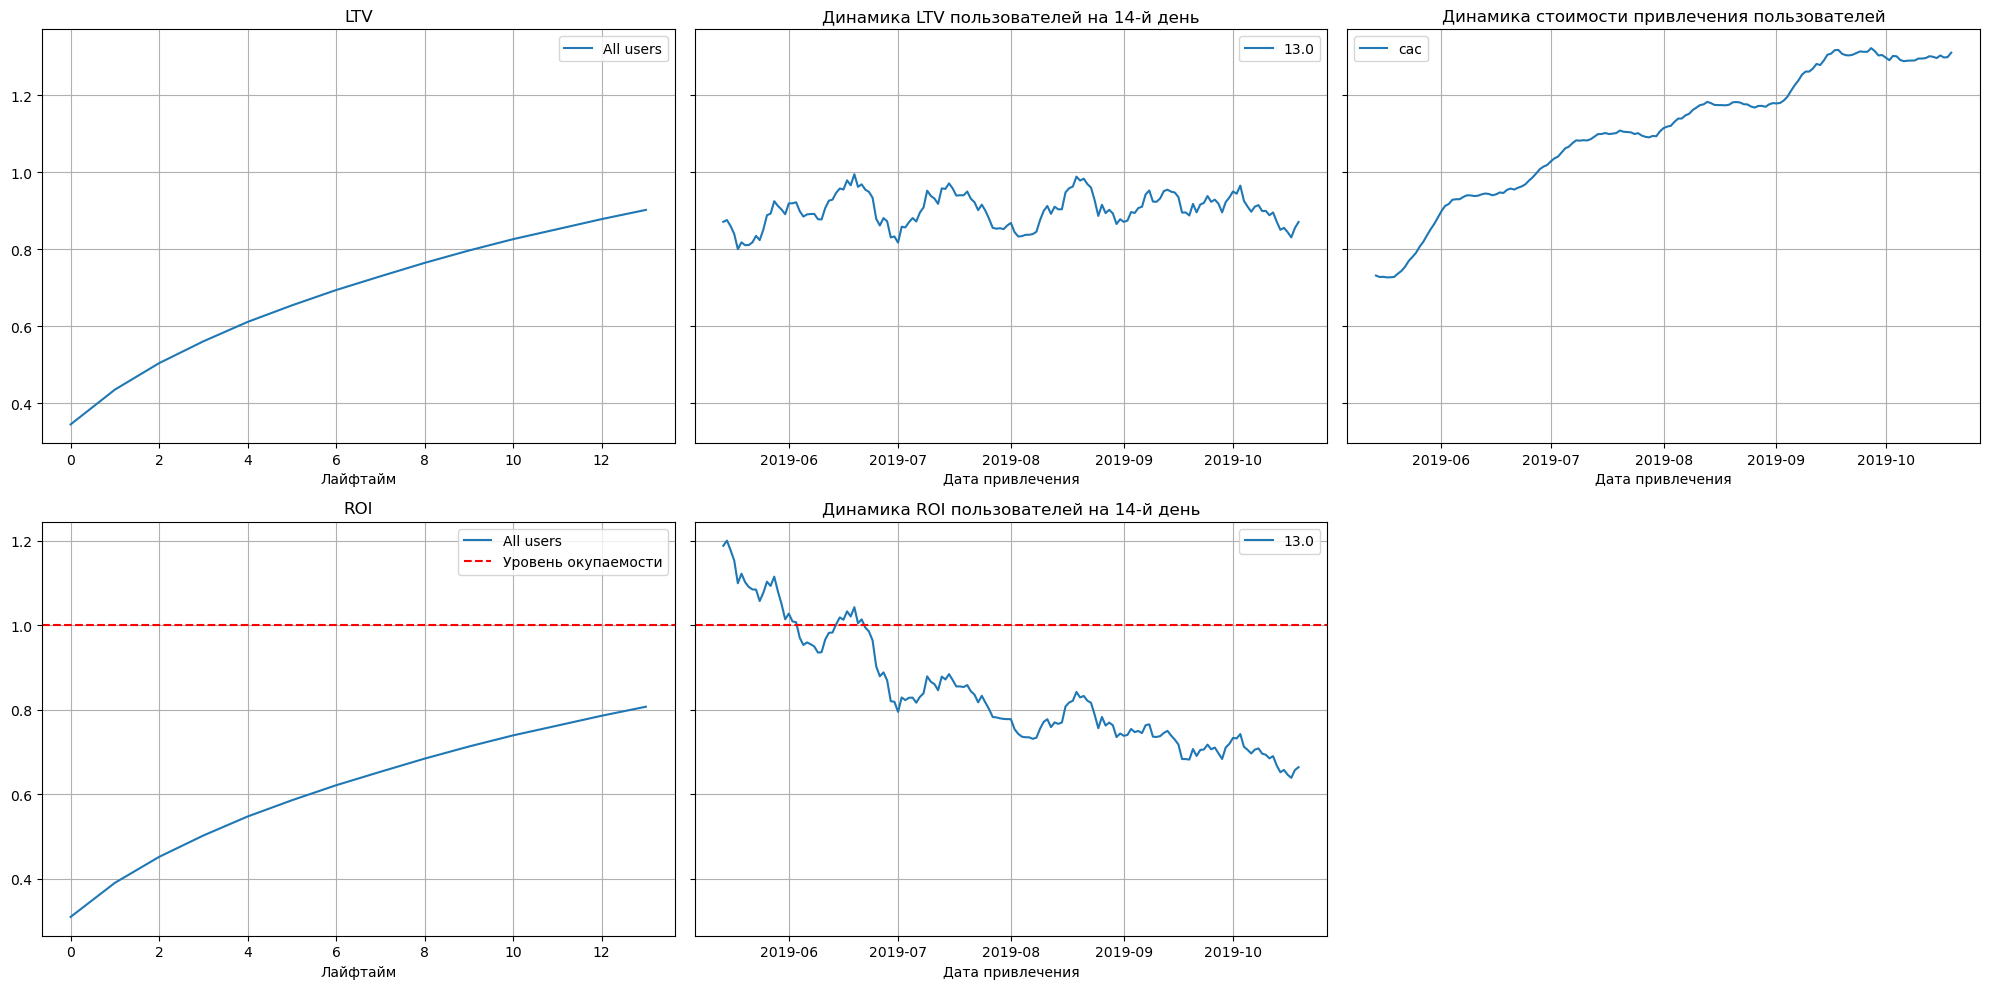

In [27]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам, представленным выше, можно сказать следующее:
 - по динамике LTV нет большого разброса, значения колеблются между 0.8 - 1.0 у.е.
 - стоимость привлечения клиентов стабильно растет на протяжении всего эксперимента
 - реклама не окупается за 14 дней, результатом является лишь 80% окупаемости
 - динамика ROI показывает, что с июня реклама работает в убыток. Стоимость привлечения растет, а ROI падает примерно с той же "скоростью"

### Окупаемость рекламы с разбивкой по устройствам. 

Проанализируем окупаемость рекламы с разбивкой по устройствам

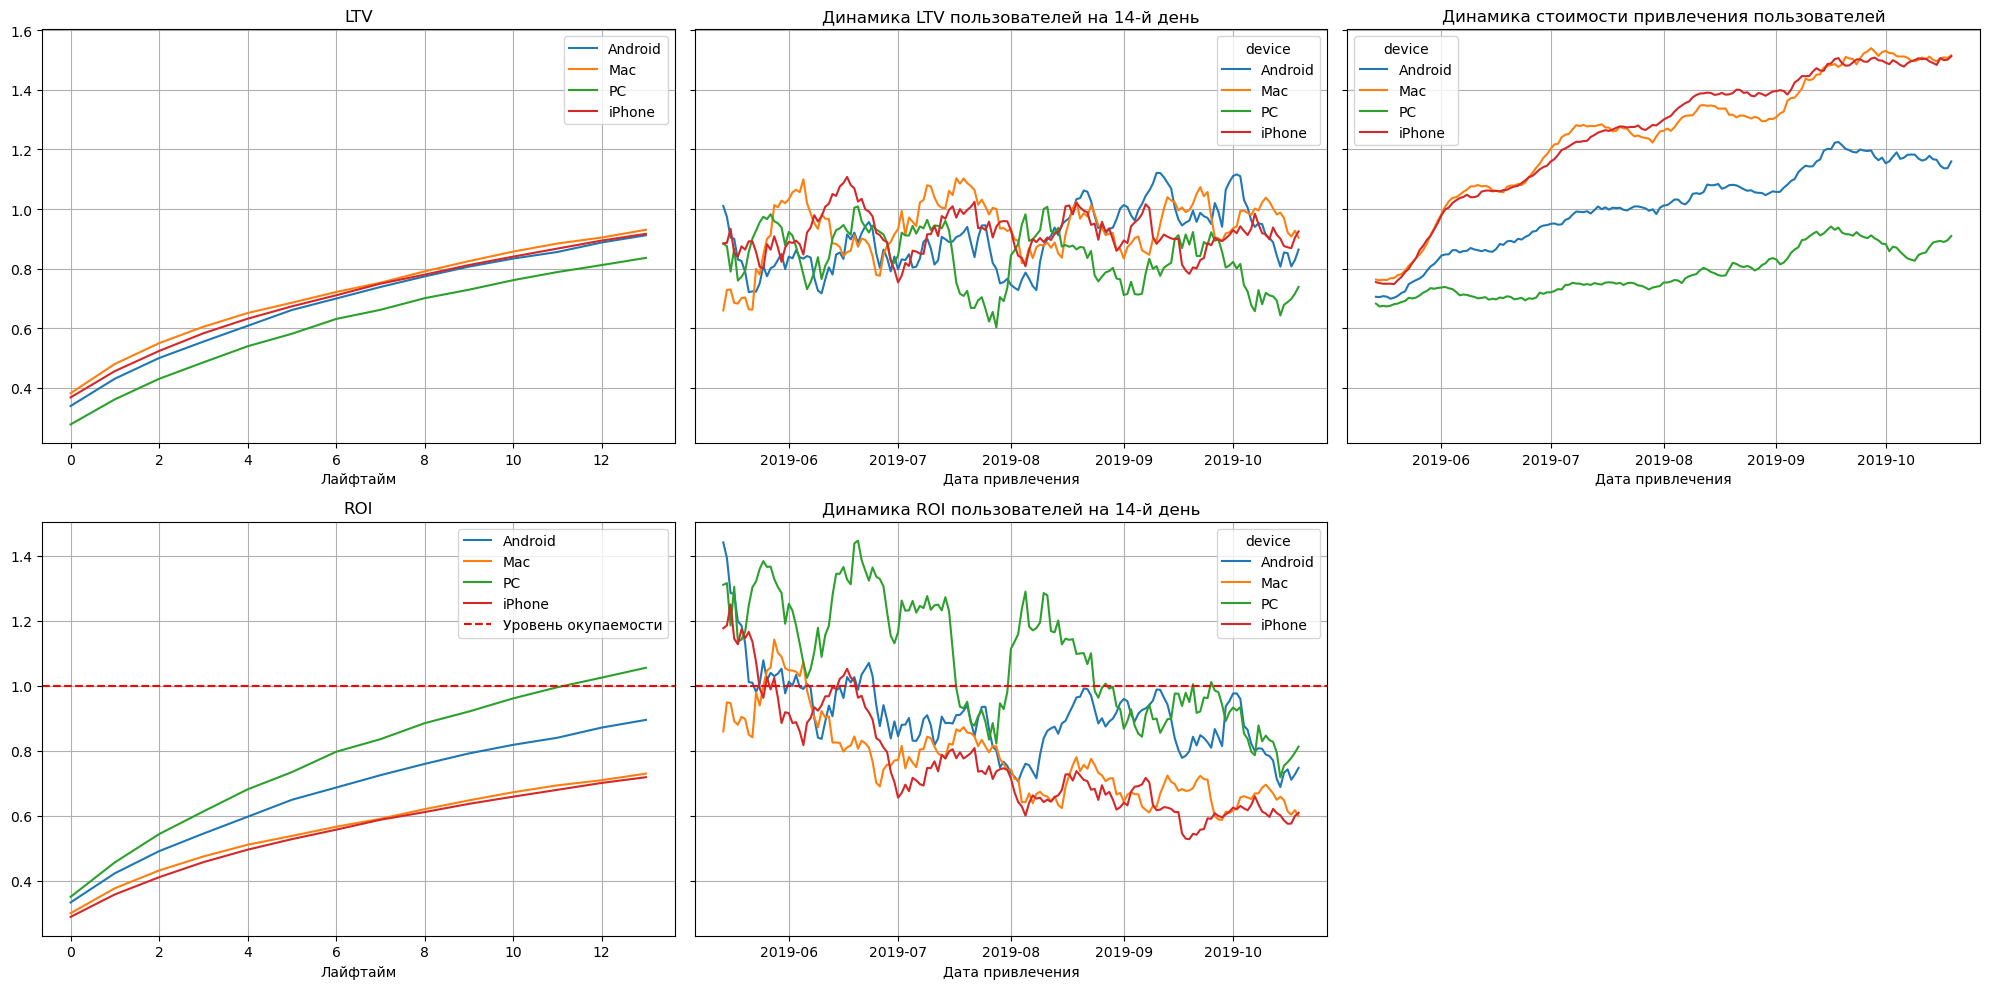

In [28]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

LTV здесь вполне стабильно по всем устройствам. Стоимость привлечения росла с течением времени, в июне был резкий скачок для клиентов с Маками и Айфонами, а вот владельцы ПК держатся почти на одном уровне. ROI положительный только у владельцев ПК. по динамике ROI можно сказать, что владельцы ПК хорошо "окупались" до сентября, с конца августа ROI стал ниже 1.

Теперь рассмотрим конверсию.

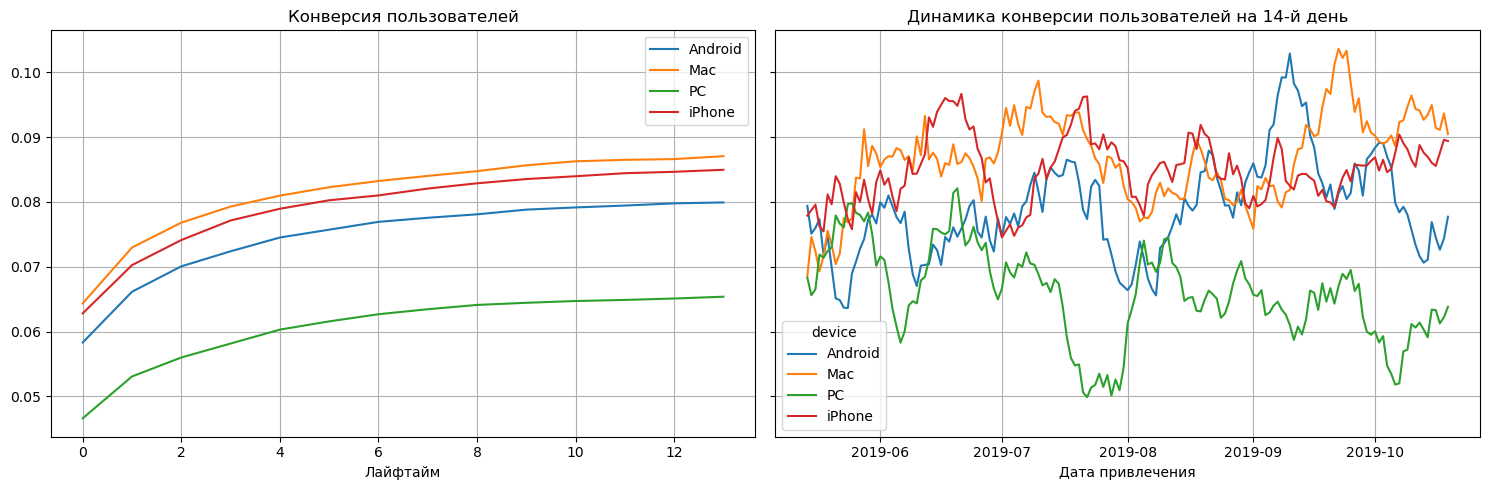

In [29]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая плохая конверсия у владельцев ПК, лучшая - Макбук. В динамикой все идентично.

Осталось посмотреть удержание пользователей.

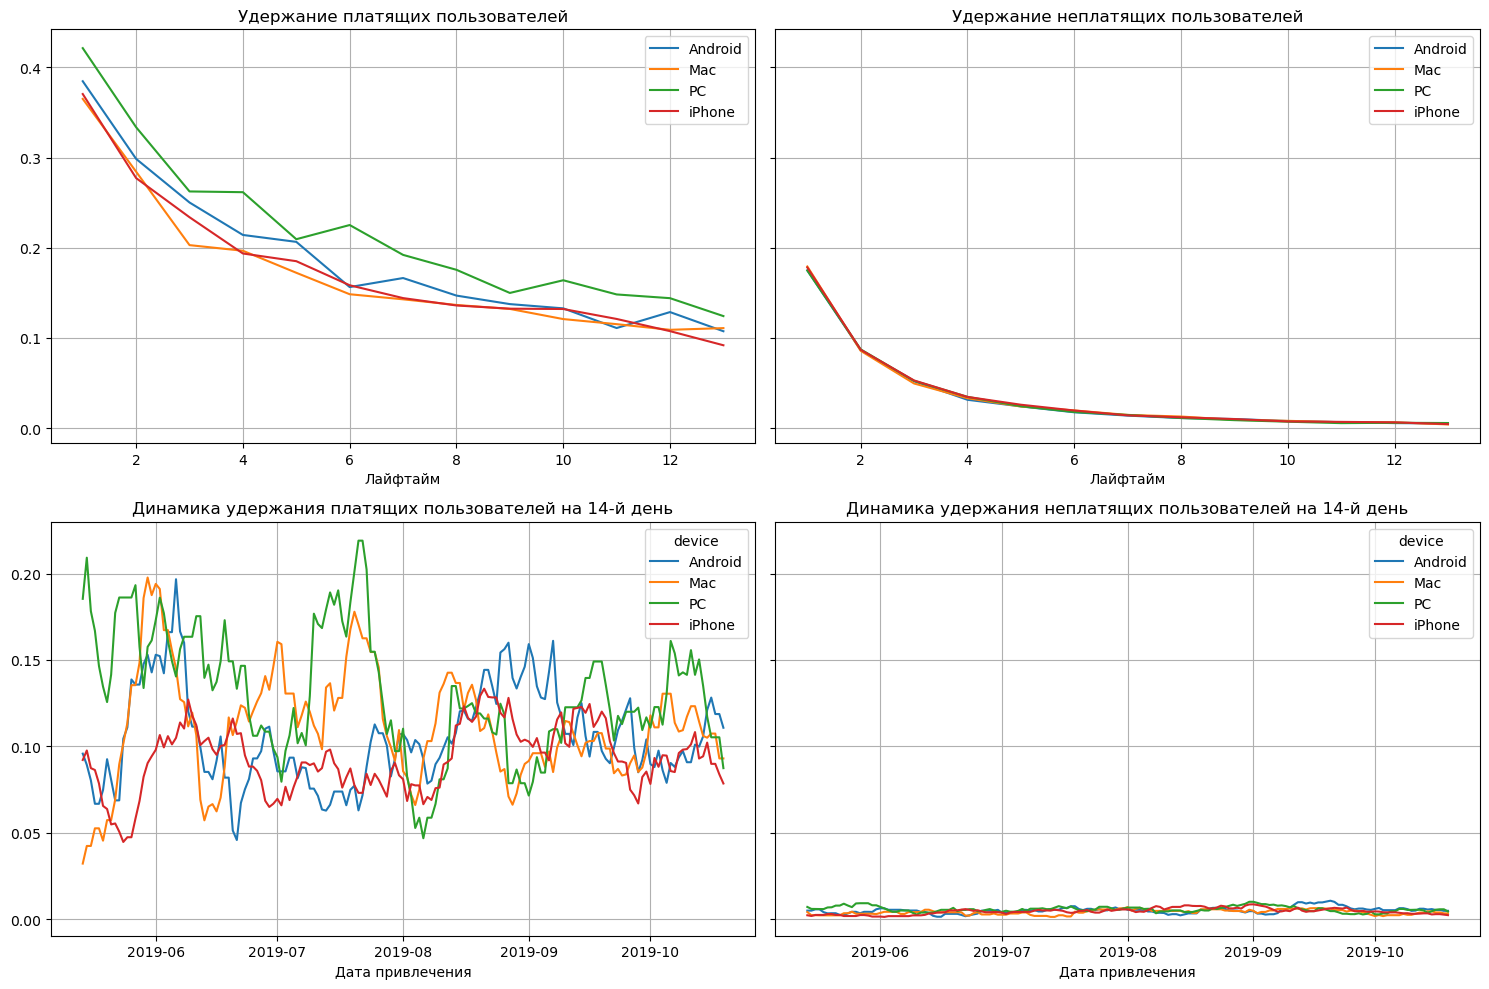

In [30]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

По графикам нет конкретного ответа по поводу удержания пользователей на основании его устройства, все плюс-минус идентично.


### Окупаемость рекламы с разбивкой по странам

Проанализирем окупаемость рекламы с разбивкой по странам

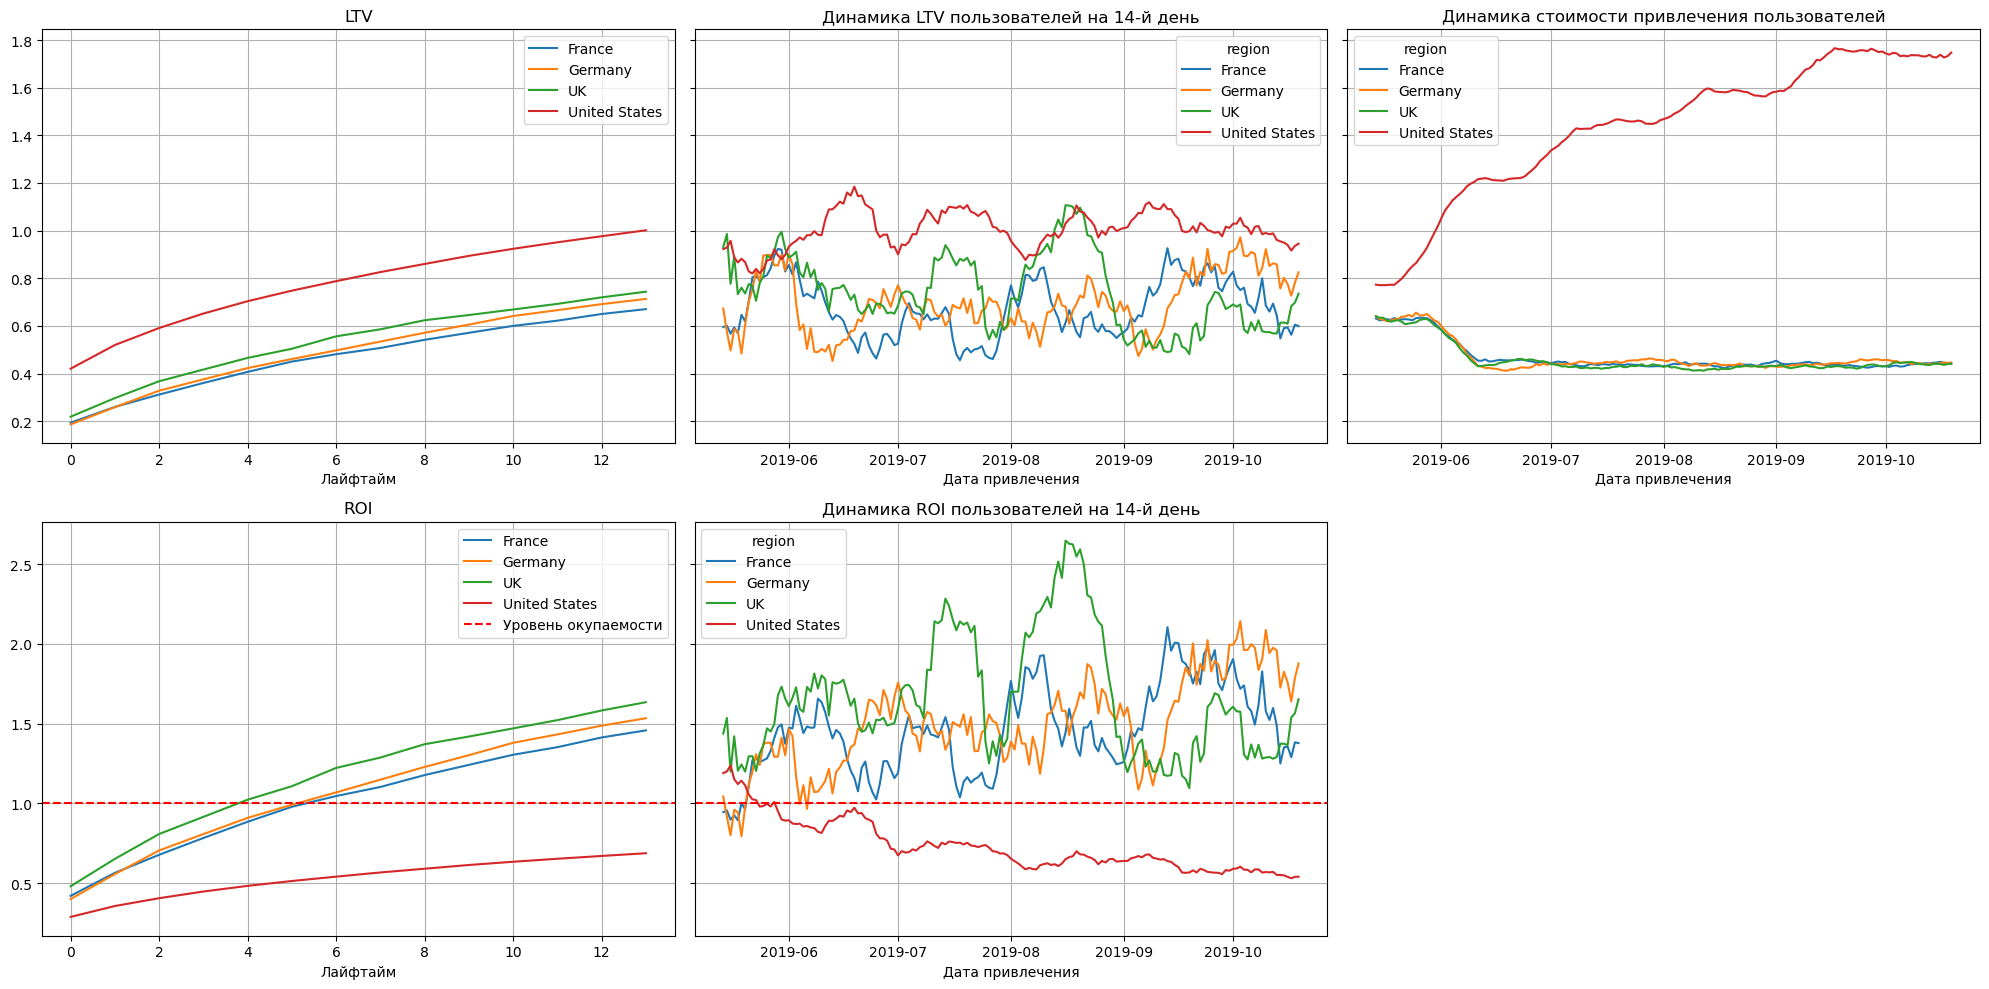

In [31]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

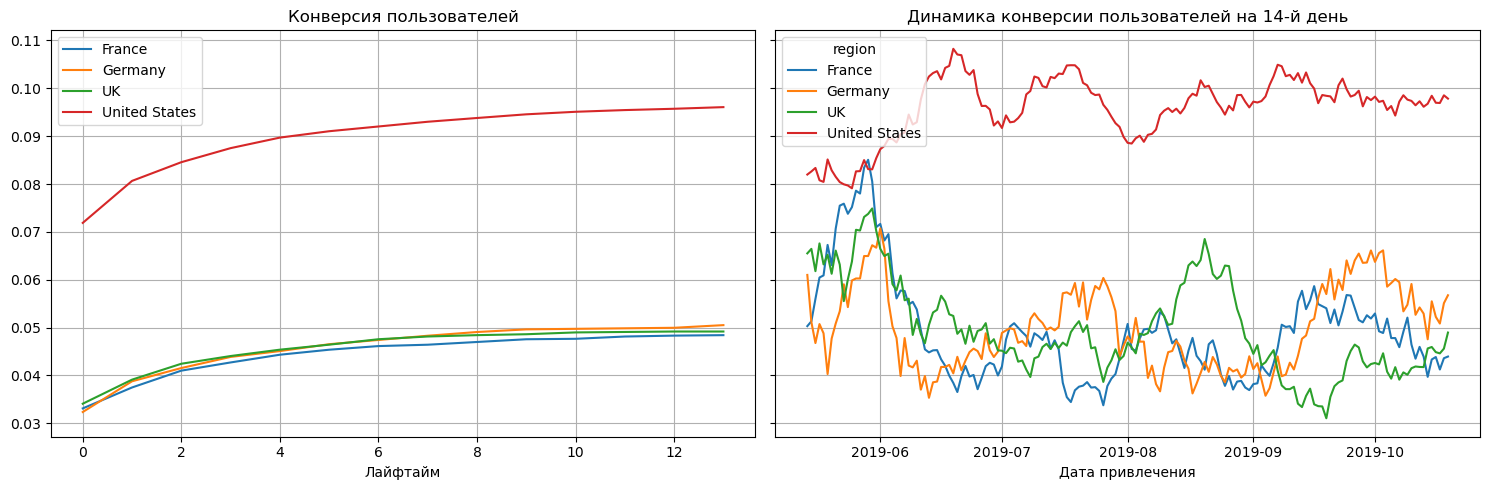

In [32]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

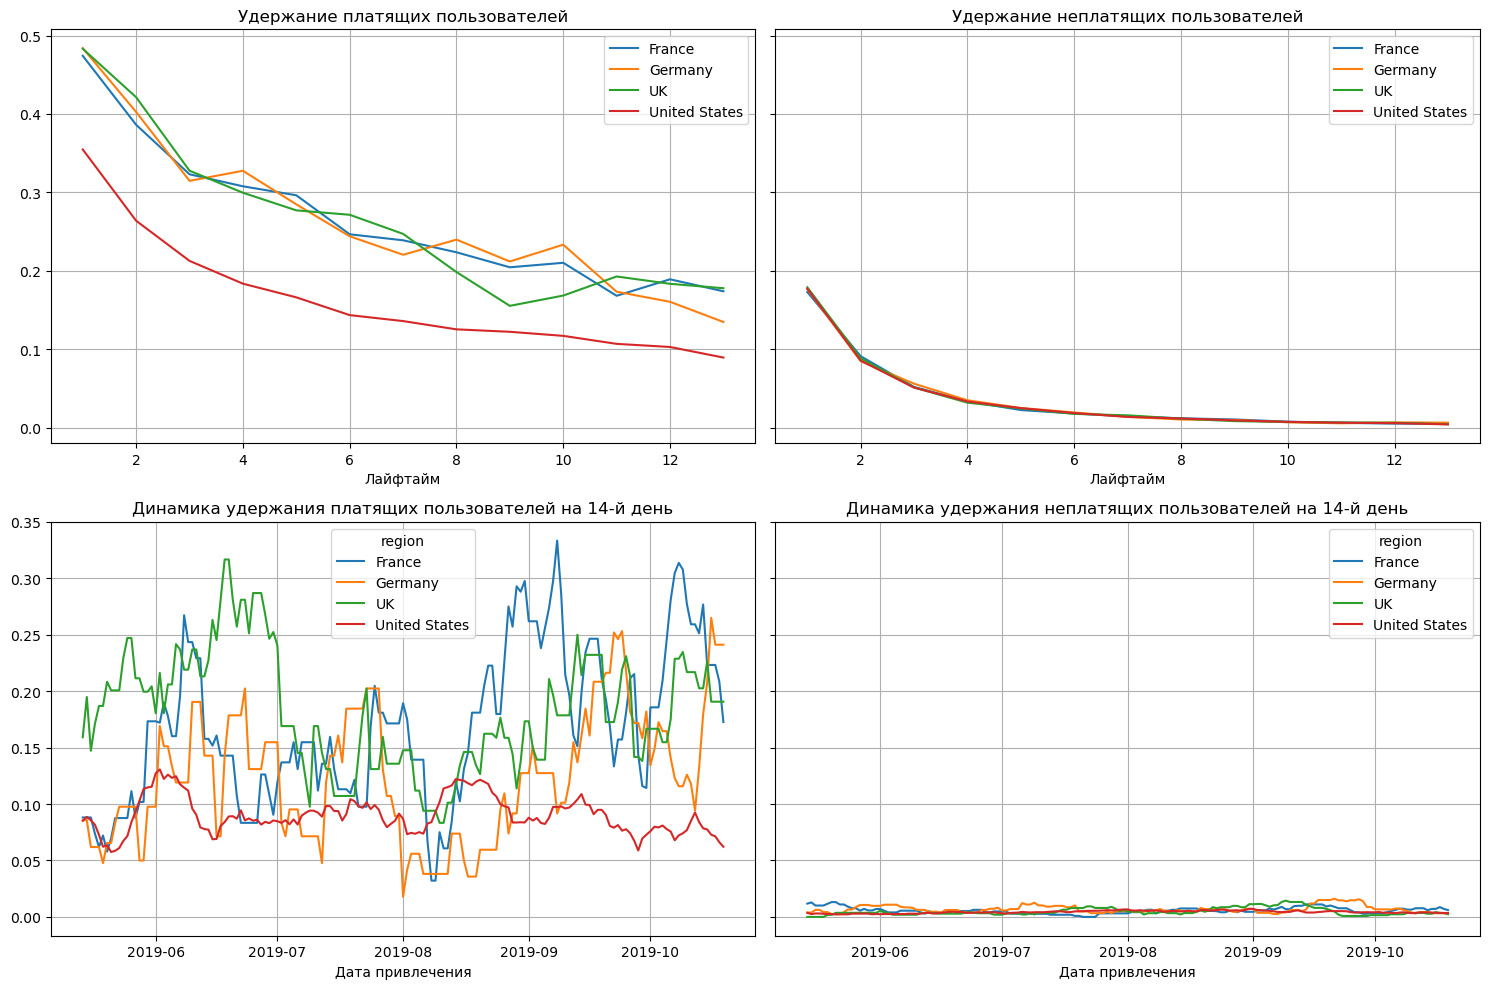

In [33]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

По всем представленным выше графикам явно выделяется США:
 - самый большой LTV
 - с июня LTV для США стал расти, в тоже время, для Европейских стран он снизился
 - для Европейских стран ROI положительный, в США нет окупаемости
 - в США хорошая, стабильная конверсия, выше Европейской
 - так же в США самый низкий показатель удержания клиентов
 
После полученных данных, считаю необходимым рассматривать США отдельно от всей выборки, так как проблема кроется где-то в ней.

### Окупаемость рекламы с разбивкой по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

Первым делом посмотрим выборку только по США.

In [34]:
profiles_usa = profiles.query('region == "United States"')

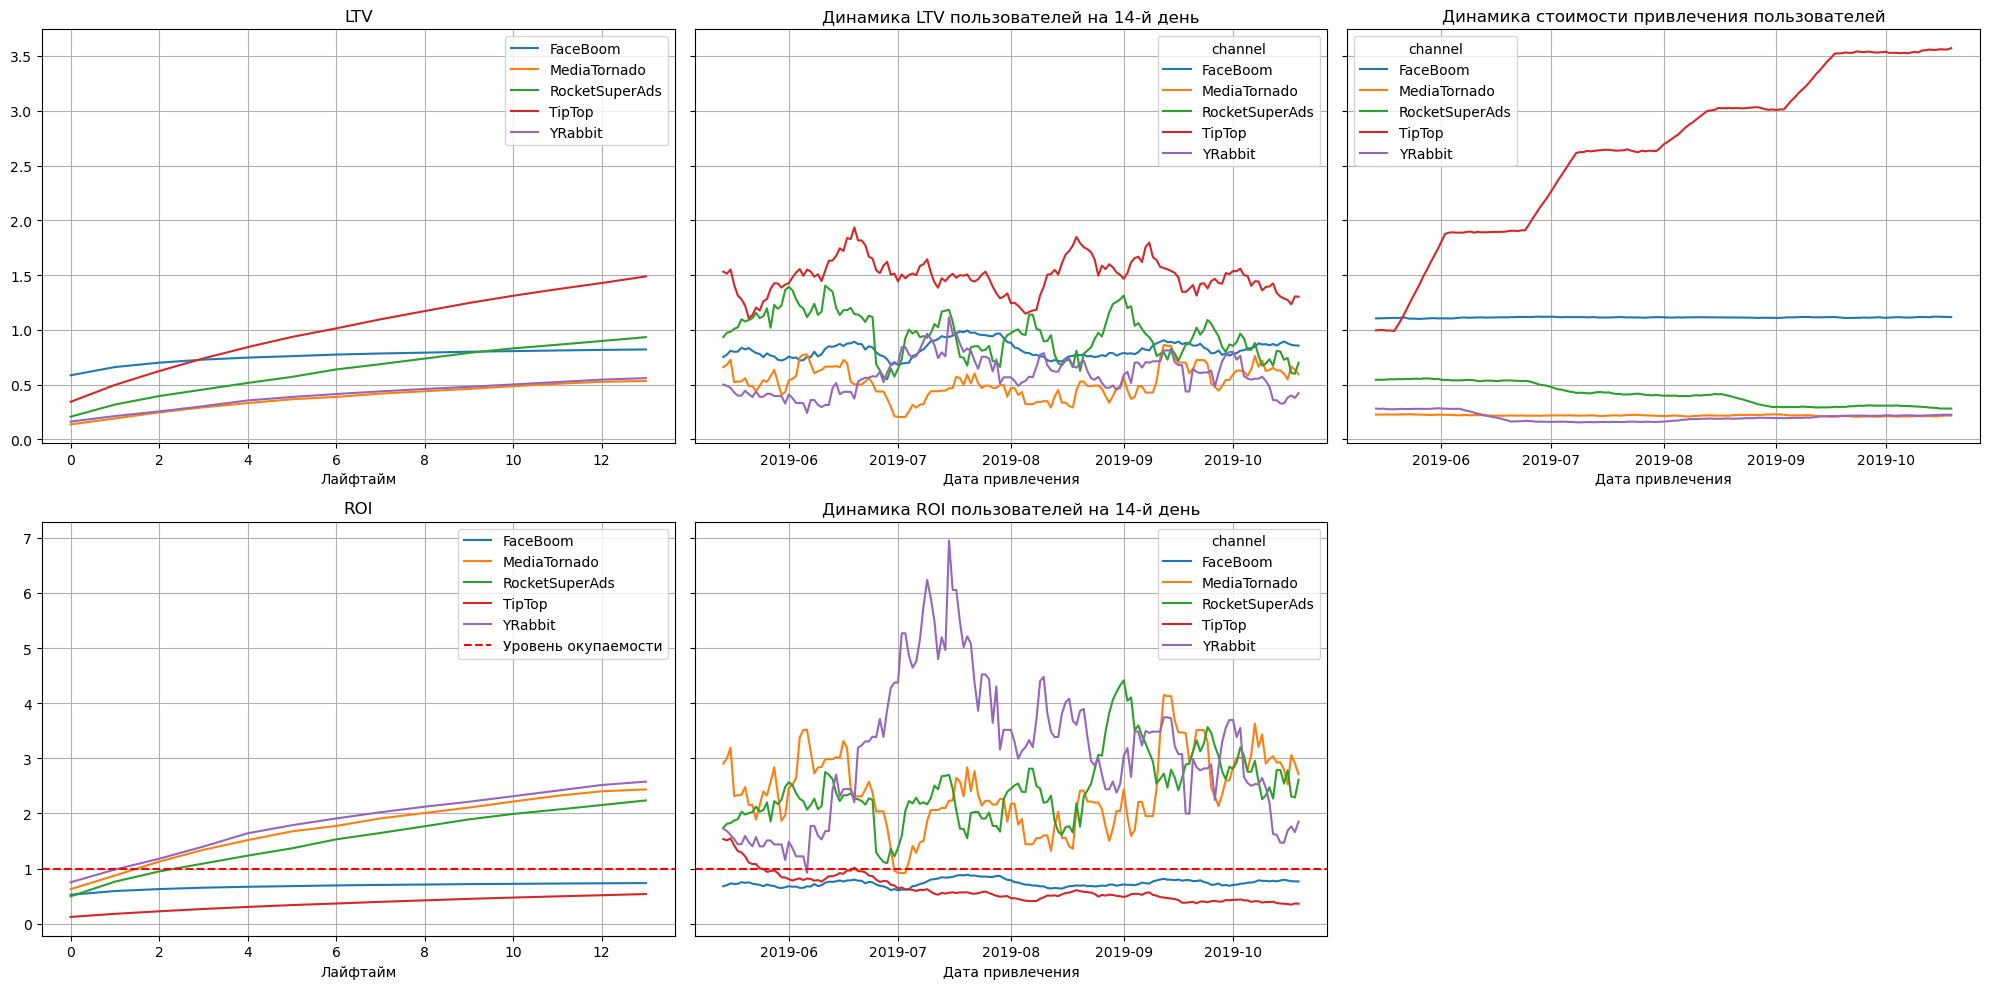

In [35]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

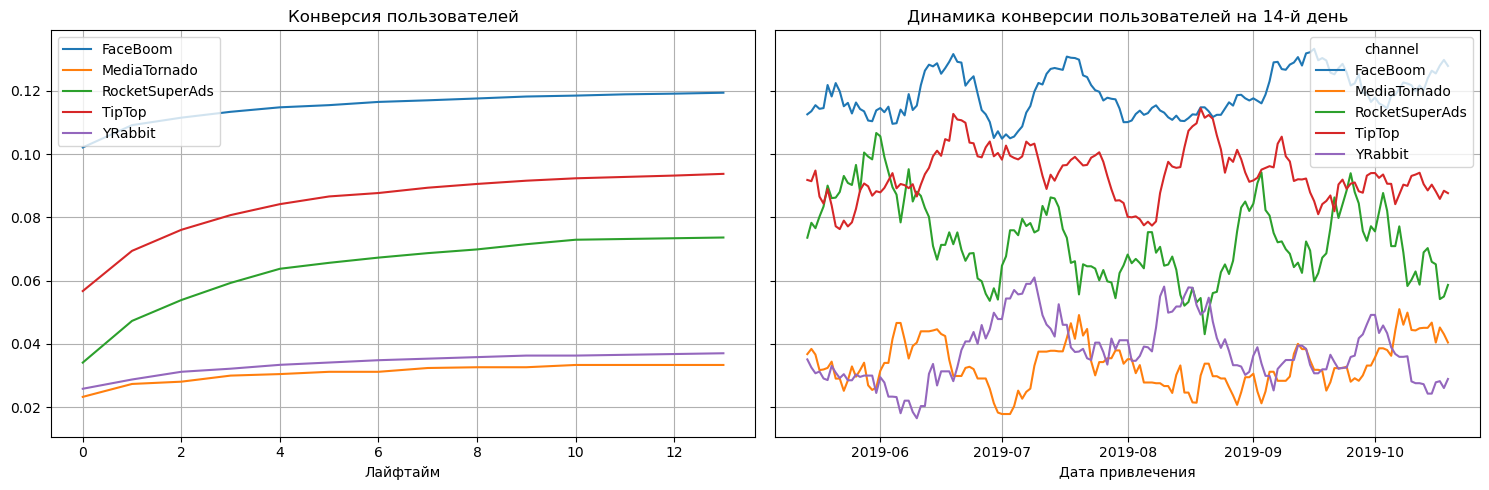

In [36]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

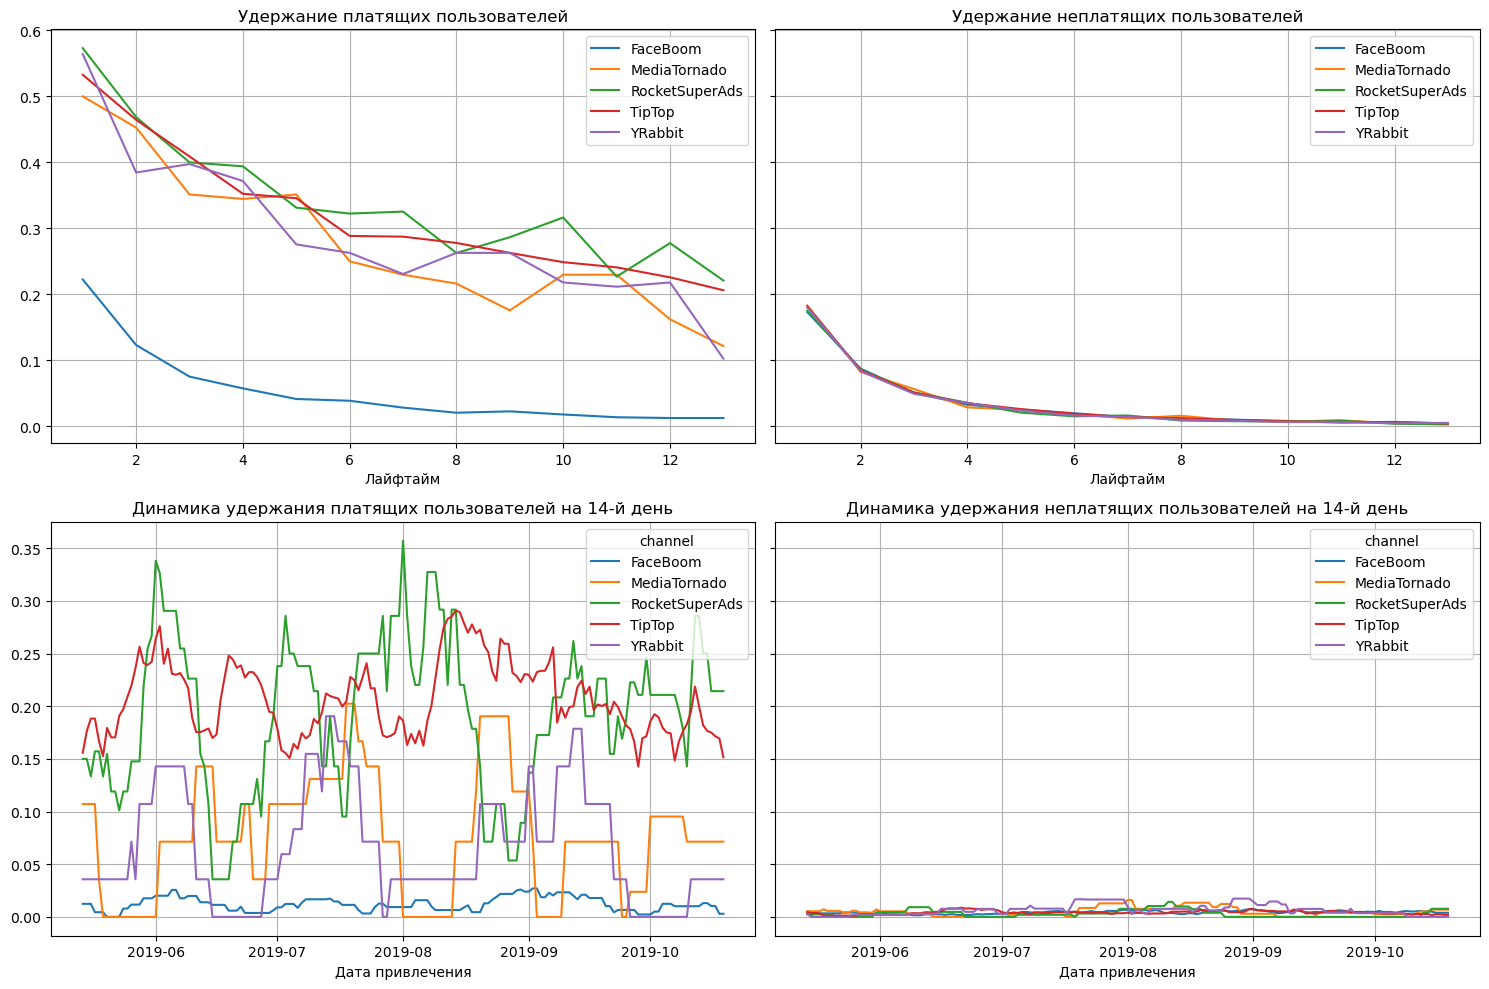

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, sessions, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

Здесь, как и раньше, выбиваются TipTop и FaceBoom. 

LTV  самый высокий у канала TipTop, САС растет с каждым месяцем, в то же время у канала FaceBoom стабильная стоимость привлечения клиентов. 
Отрицательные ROI и ROI в динамике только у TipTop и FaceBoom, но конверсия самая высокая у этих же каналов.
Так же у канала FaceBoom самое плохое удержание платящих клиентов.

Теперь проанализируем окупаемость рекламы в странах Европы с разбивкой по каналам.

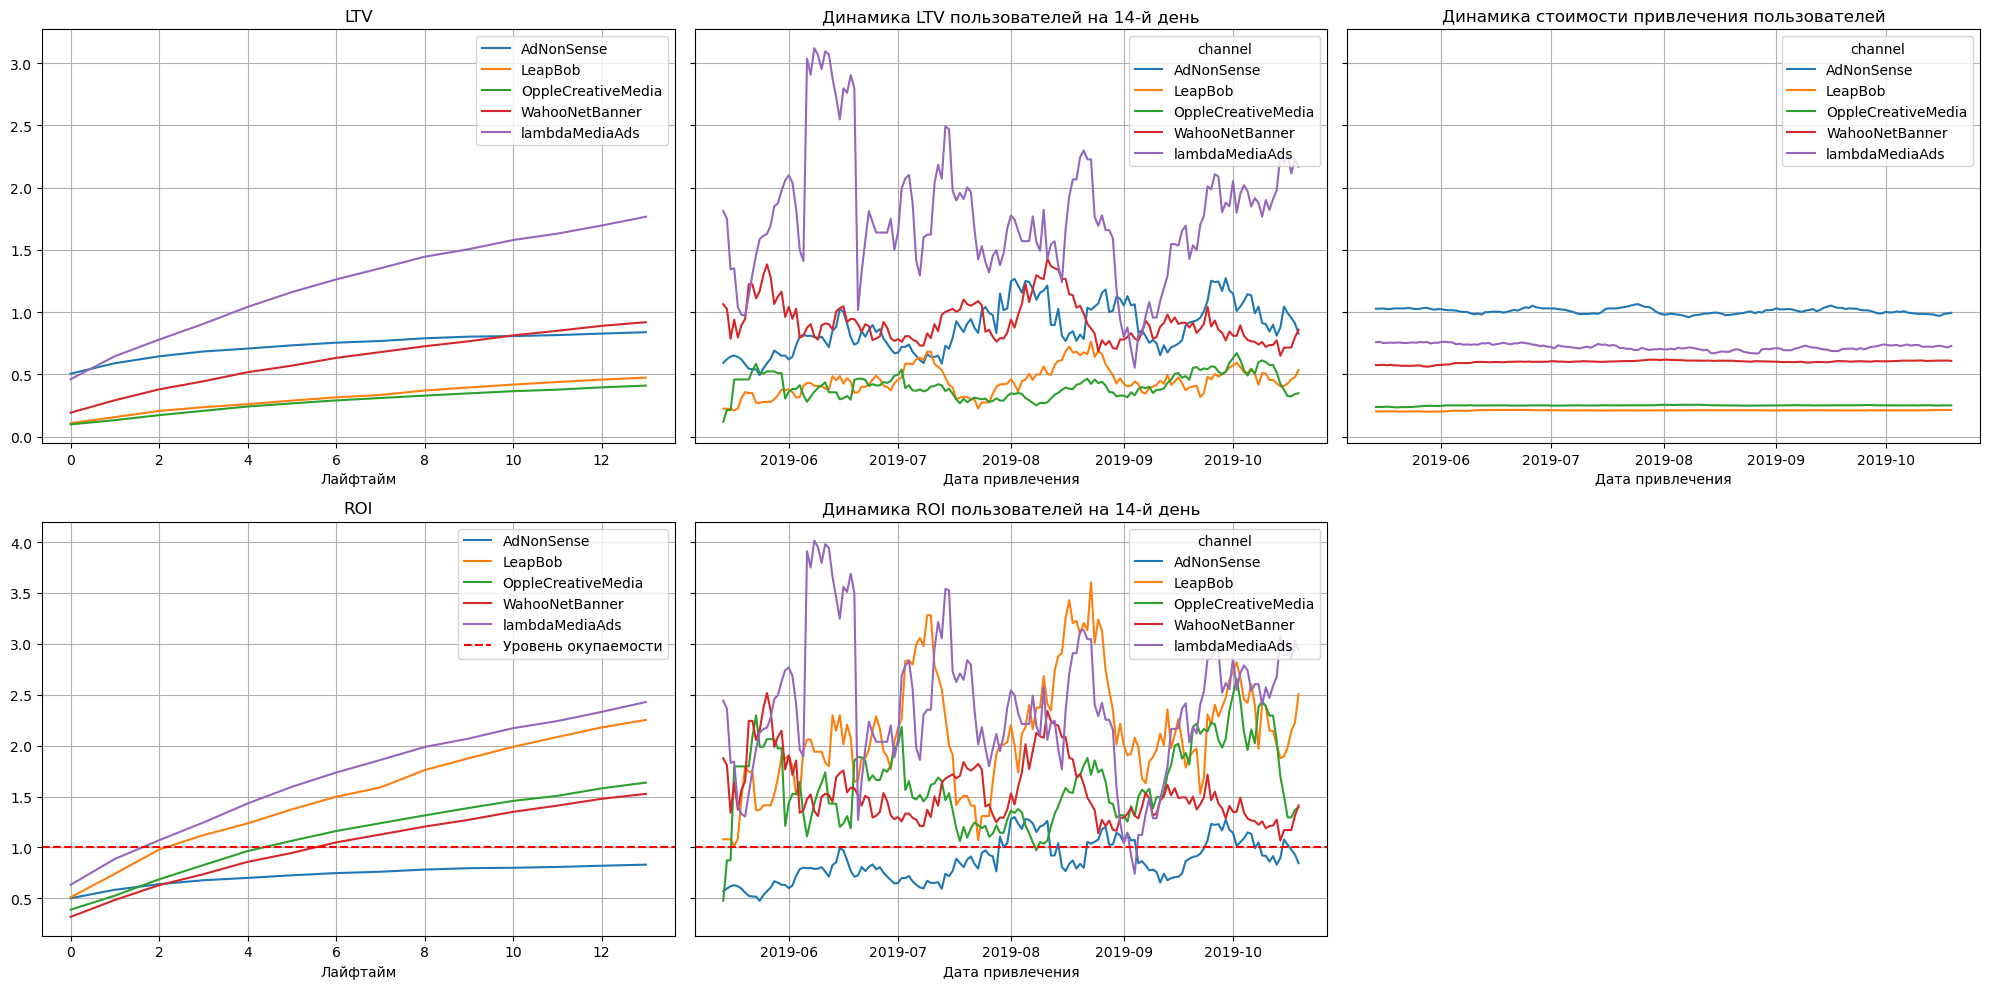

In [38]:
profiles_eu = profiles.query('region != "United States"')

dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

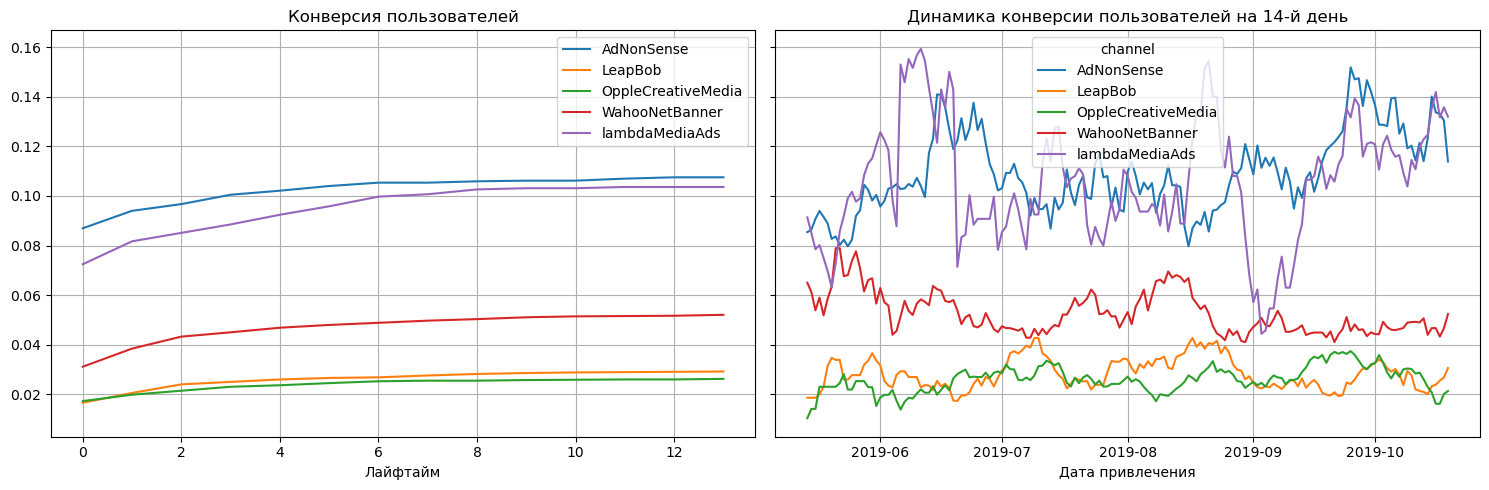

In [39]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

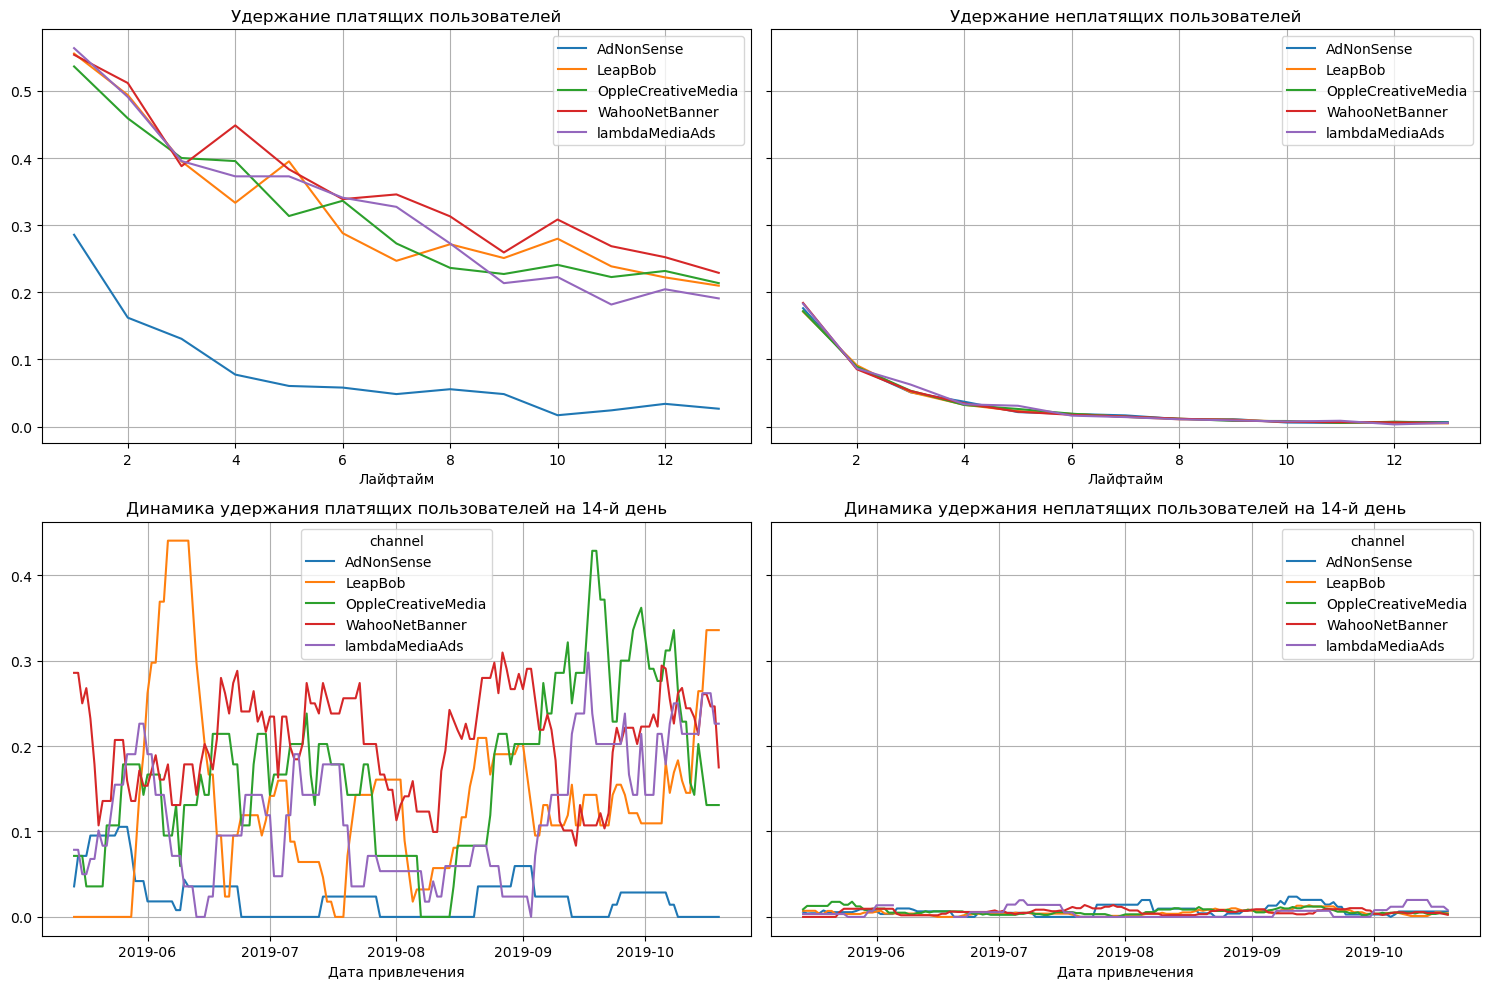

In [40]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_eu, sessions, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

LTV для Европейских пользователей похож на США. ROI и ROI в динамике отрицательные только у AdNonSense. Конверсия lambdaMediaAds и AdNonSense самая лучшая среди представленных каналов. У AdNonSense низкое удержание пользователей.

### Окупаемость рекламы в США с разбивкой по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам в США

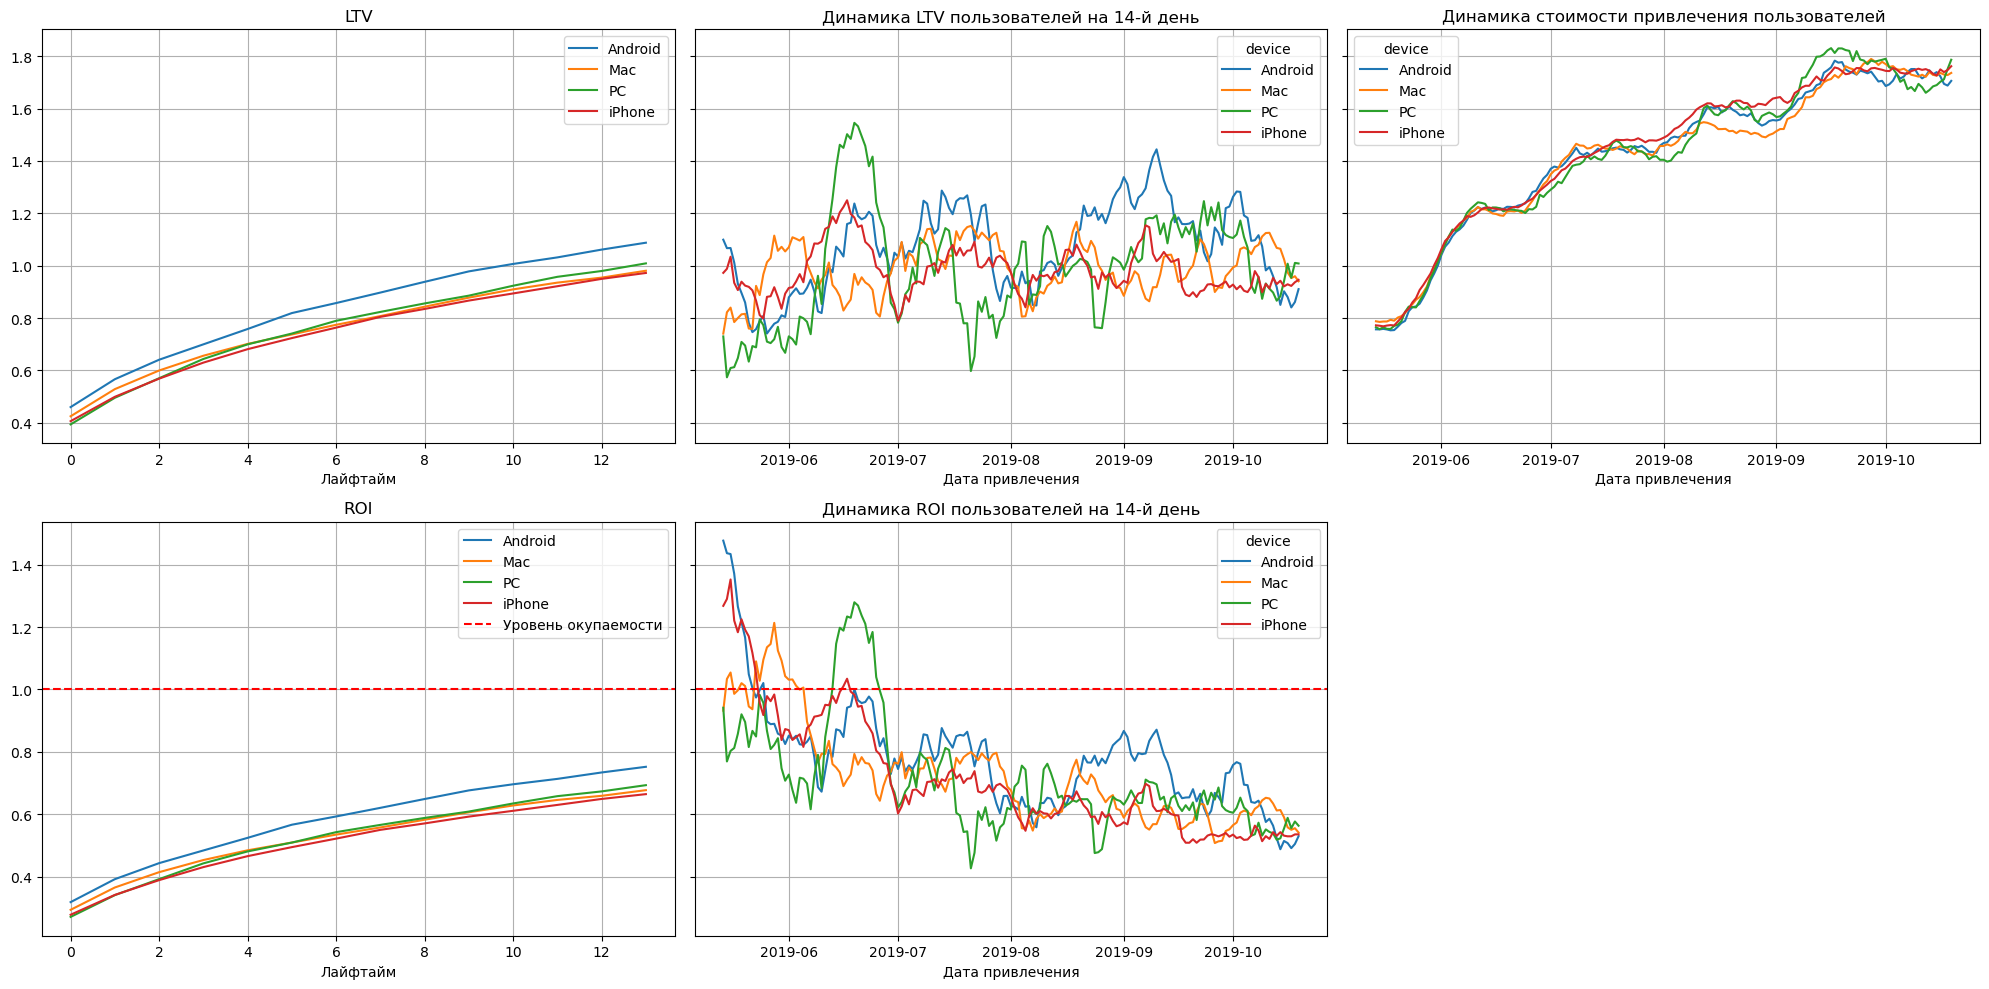

In [41]:
profiles_usa = profiles.query('region == "United States"')

dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

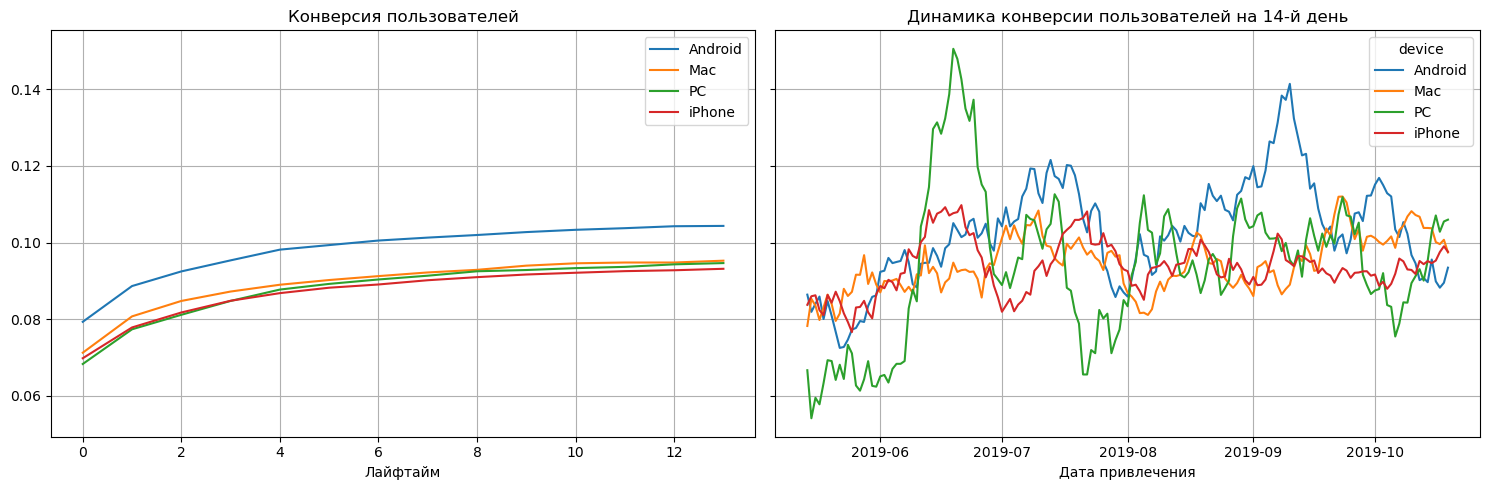

In [42]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

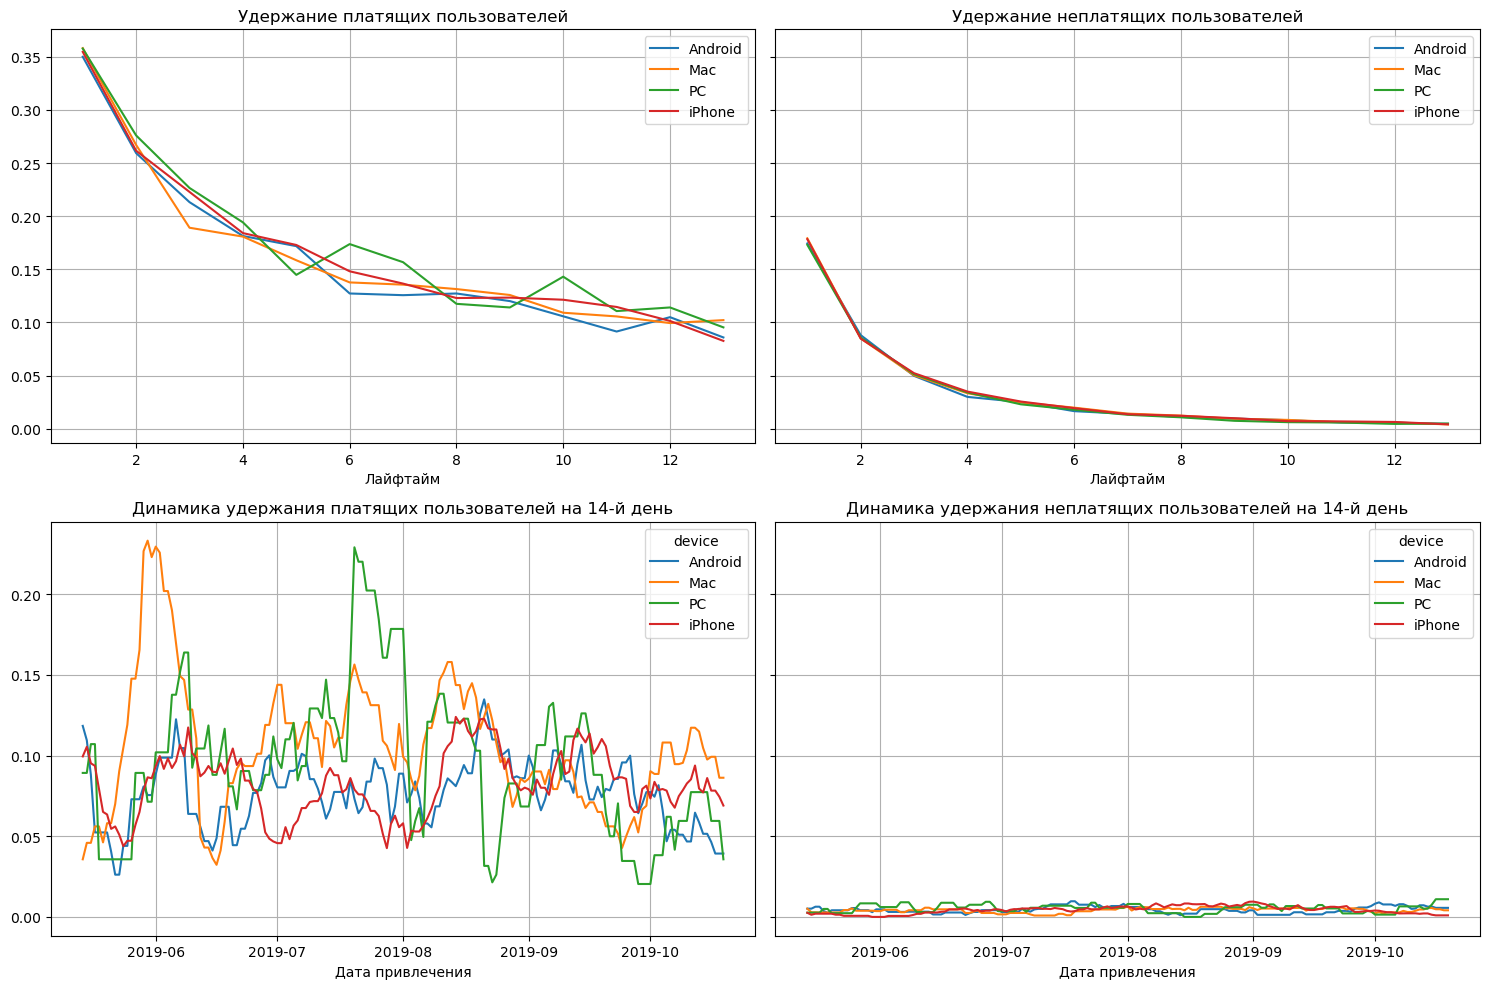

In [43]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, sessions, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

В общем и целом, никакое из устройств сильно не выбивается, все в пределах разумной погрешности.

### Выводы по окупаемости рекламы

 - В целом, реклама не окупилась
 - Основное негативное влияние оказывают пользователи из США, канал TipTop
 - Проблемы с окупаемостью вызваны распределением средств на рекламу, большое количество пользователей приходят с дорогой и малоэффективной рекламы, так же видно плохое удержание платящих пользователей

## Напишите выводы
В данной работе мы провели большое исследование по оценки окупаемости рекламы в приложении ProcrastinatePRO+. 

Для начала мы привели данные к рабочему виду для дальнейшей работы, а именно:
- привели все столбцы к нижнему регистру с заполнением пробелов на нижнее подчеркивание
- изменили тип в столбцах с датами на datetime
- провели поиск дубликатов и пропусков

Далее провели общий анализ проблем в приложении:
- предварительно выявили лучшие и худшие каналы привлечения клиентов
- ТОП устройств: iPhone используют 54479, Android используют 35032, PC используют 30455, Mac используют 30042
- США лидирует по количеству клиентов, количеству платящих клиентов и у них самый высокий процент платящих клиентов
- в США 100002 посетителей, в Англии 17575 посетителей, во Франции 17450 посетителей, в Германии 14981 посетителей
- лучший процент платящих клиентов с рекламы FaceBoom, всего 29144 пользователей, 3557 оплат (12.20%)

В исследовании маркетинга выявили:
- общая сумма затрат на маркетинг за период 2019.05.01 - 2019.10.27 составила 105497 у.е.
- основные затраты на маркетинг были в каналы TipTop и FaceBoom
- виден рост инвестиций в каналы TipTop и FaceBoom по месяцам
- самый высокий САС у канала TipTop

При исследовании окупаемости рекламы выявили, что:
- Основные проблемы приходятся на инвестиции в каналы FaceBoom и TipTop в США, AdNonSense в Европе
- Имеется общая проблема с удержанием платящих пользователей
- Выяснили, что темп затрат на рекламу увеличивался с каждым месяцем, а результатов он не приносил
- Основной переломный момент выпал на июнь 2019. Резкое падение ROI говорит либо о каких-то событиях в мире и в частности в США, либо о глобальном обновлении приложения, которое пришлось не по душе пользователям

Рекомендации для отдела маркетинга.
- нужно искать новые каналы привлечения клиентов
- пересмотреть инвестиции в каналы TipTop и FaceBoom
- увеличить свое влияние на Европейском рынке
- привлекать больше ПК пользователей
- увеличить инвестиции в lambdaMediaAds, Yrabbit и MediaTornado 
- ПК пользователи удерживаются очень хорошо, но имеют низкую конверсию. Нужно посмотреть на все шаги покупателя